In [3]:
# Impor semua library yang dibutuhkan
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat dataset menggunakan nama file Anda yang benar
df_videos = pd.read_csv('trending.csv')
with open('category.json') as f:
    category_data = json.load(f)

# 2. Membuat 'kamus' untuk menerjemahkan ID kategori menjadi nama
category_map = {int(item['id']): item['snippet']['title'] for item in category_data['items']}

# 3. Menambahkan kolom 'category_name' ke data utama
df_videos['category_name'] = df_videos['category_id'].map(category_map)

print("✅ Dataset berhasil dimuat dan nama kategori telah ditambahkan.")
df_videos.head() # Menampilkan 5 baris pertama untuk diperiksa

✅ Dataset berhasil dimuat dan nama kategori telah ditambahkan.


/tmp/ipython-input-3-524776837.py:8: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_videos = pd.read_csv('trending.csv')


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,category_name
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00,Music
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00,News & Politics
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00,Autos & Vehicles
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00,Gaming
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00,Sports


In [5]:
# Cek nama kolom yang sebenarnya
print(df_videos.columns)

Index(['video_id', 'publish_time', 'channel_id', 'title', 'description',
       'thumbnail_url', 'thumbnail_width', 'thumbnail_height', 'channel_name',
       'tags', 'category_id', 'live_status', 'local_title',
       'local_description', 'duration', 'dimension', 'definition', 'caption',
       'license_status', 'allowed_region', 'blocked_region', 'view', 'like',
       'dislike', 'favorite', 'comment', 'trending_time', 'category_name'],
      dtype='object')


In [8]:
# Menggunakan format='ISO8601' sesuai saran dari error
df_videos['trending_time'] = pd.to_datetime(df_videos['trending_time'], format='ISO8601')
df_videos['publish_time'] = pd.to_datetime(df_videos['publish_time'], format='ISO8601')

# Membuang kolom yang tidak relevan
df_videos = df_videos.drop(['video_id', 'thumbnail_url', 'description'], axis=1)

# Memeriksa ringkasan
print("✅ Data telah dibersihkan dan format tanggal sudah benar.")
df_videos.info()

✅ Data telah dibersihkan dan format tanggal sudah benar.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172347 entries, 0 to 172346
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   publish_time       172347 non-null  datetime64[ns, UTC]
 1   channel_id         172347 non-null  object             
 2   title              172347 non-null  object             
 3   thumbnail_width    119225 non-null  float64            
 4   thumbnail_height   119225 non-null  float64            
 5   channel_name       172347 non-null  object             
 6   tags               147148 non-null  object             
 7   category_id        172347 non-null  int64              
 8   live_status        172347 non-null  object             
 9   local_title        172347 non-null  object             
 10  local_description  165692 non-null  object             
 11  duration           172347 non-null

/tmp/ipython-input-9-559364861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_videos['category_name'], order=df_videos['category_name'].value_counts().index, palette='viridis')


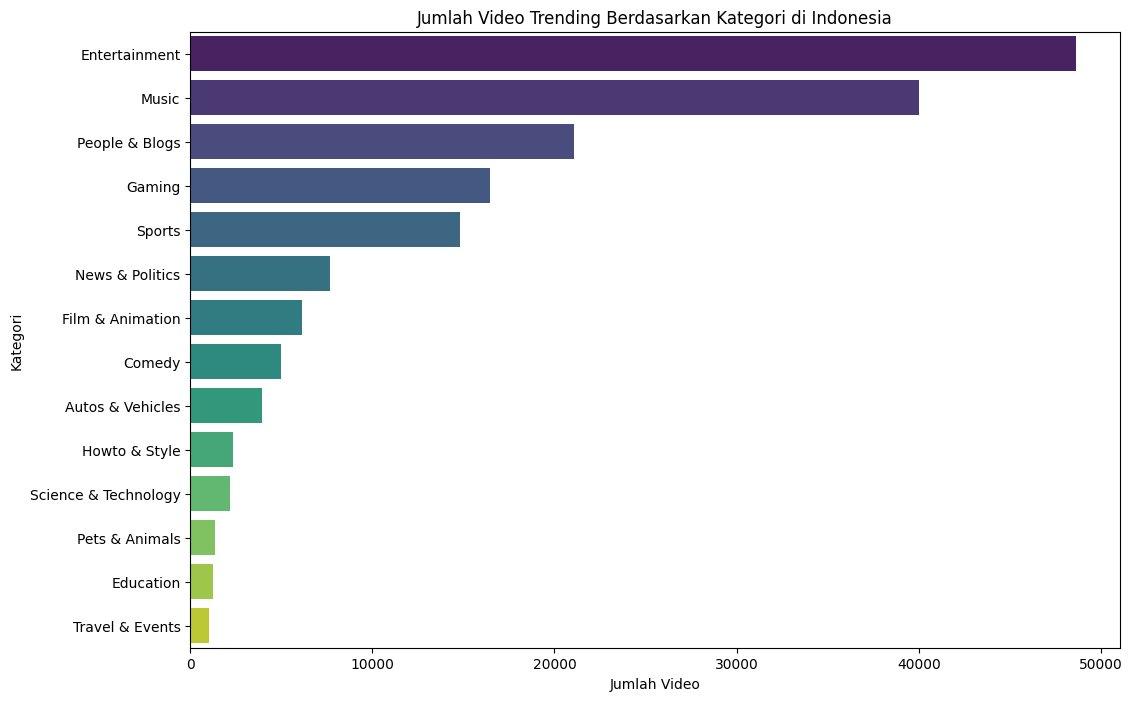

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y=df_videos['category_name'], order=df_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Jumlah Video Trending Berdasarkan Kategori di Indonesia')
plt.xlabel('Jumlah Video')
plt.ylabel('Kategori')
plt.show()

/tmp/ipython-input-10-535982315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='plasma')


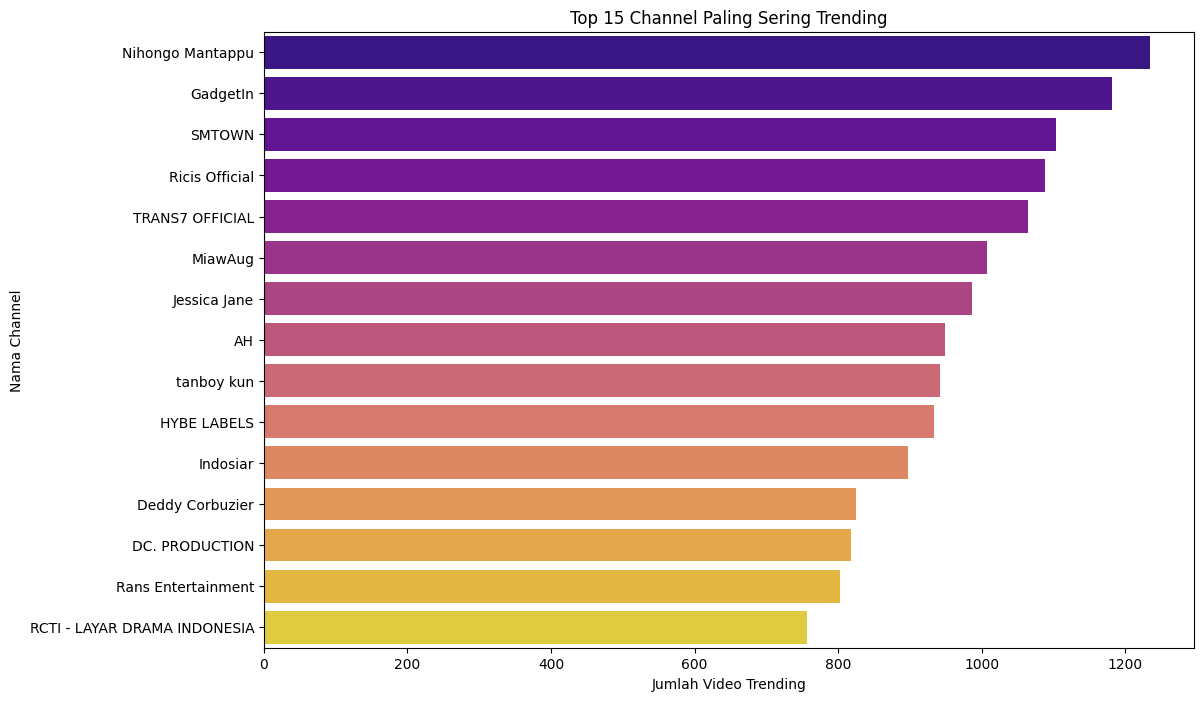

In [10]:
top_channels = df_videos['channel_name'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='plasma')
plt.title('Top 15 Channel Paling Sering Trending')
plt.xlabel('Jumlah Video Trending')
plt.ylabel('Nama Channel')
plt.show()

/tmp/ipython-input-11-535982315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='plasma')


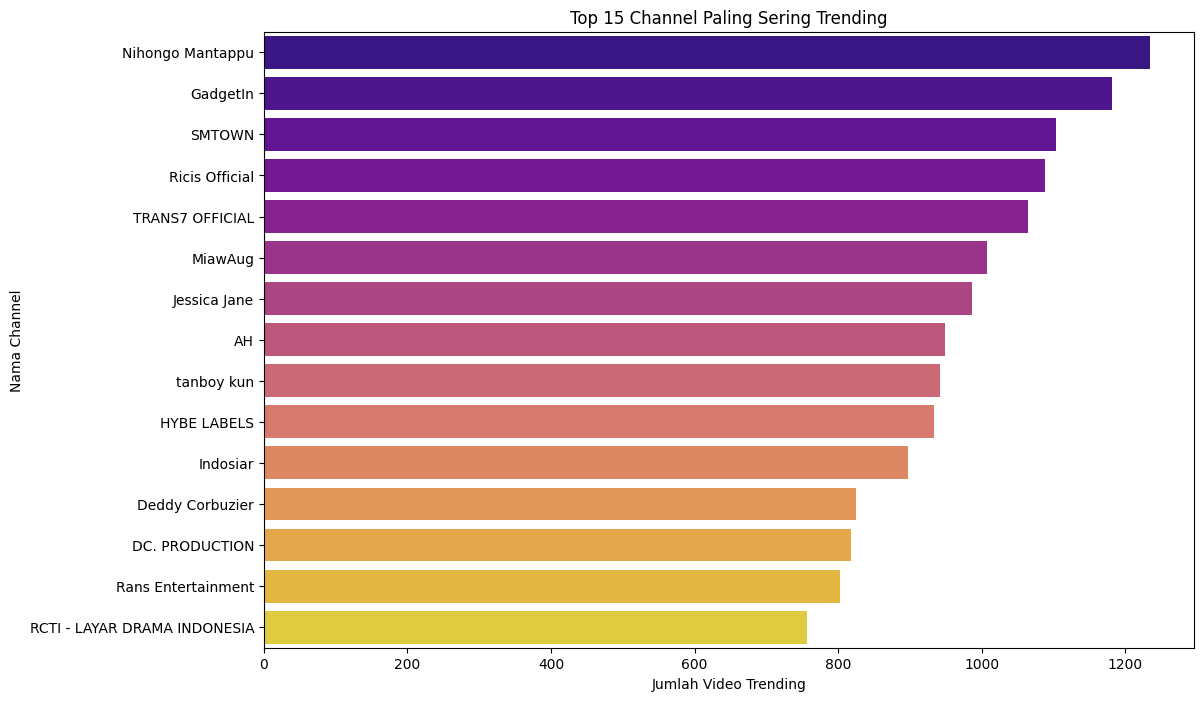

In [11]:
top_channels = df_videos['channel_name'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='plasma')
plt.title('Top 15 Channel Paling Sering Trending')
plt.xlabel('Jumlah Video Trending')
plt.ylabel('Nama Channel')
plt.show()

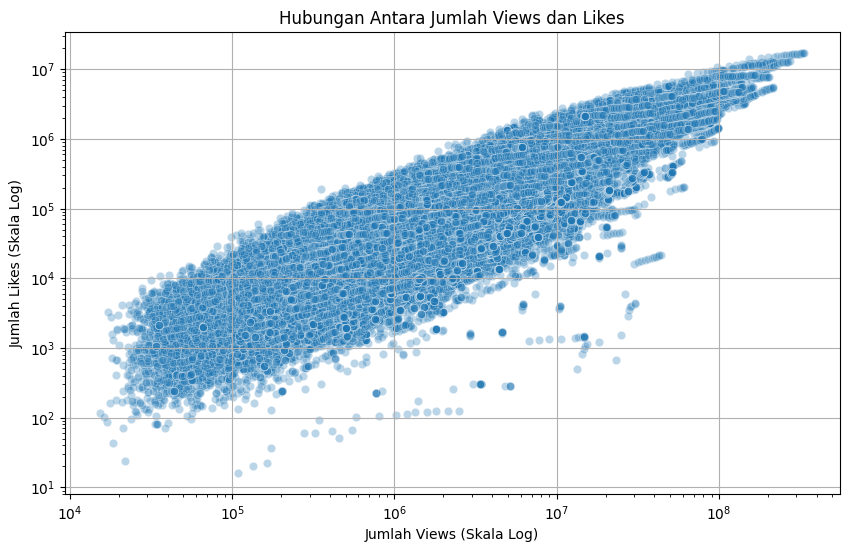

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_videos, x='view', y='like', alpha=0.3)
plt.title('Hubungan Antara Jumlah Views dan Likes')
plt.xlabel('Jumlah Views (Skala Log)')
plt.ylabel('Jumlah Likes (Skala Log)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()